# Principles of Data Science

### Lecture 20: Some "real-life" examples

_MPhil in Data Intensive Science_

**University of Cambridge**

<h2 style="color: blue">Matt Kenzie</h2>

[mk652@cam.ac.uk](mailto:mk652@cam.ac.uk)

## Leftovers from last lecture

<font color="green">Some discussion in the lectures</font>

- The "Asimov" sample
- Learnings from LHC Stats + ML group leading

## "Real-life" examples

- **Today's lecture**:
    - This lecture we will work through some examples together 
    
<br>

- **Will focus on areas where I have had several questions**
    
    - Likelihoods (and their projections)
    - Hypothesis Testing
    - Limit setting and the $CL_{s}$ method


In [1]:
%matplotlib widget

In [2]:
%%html
<style>
div.jupyter-widgets.widget-label {display: none;}
</style>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../mphil.mplstyle')

## Visualising the likelihood

- Want to show a few ways of visualising the likelihood to help clarify

- Let's generate some data 
- In some random variable $X$ our **observable**
- Will then compute the **likelihood** we got this data (a function of the **parameters**, $\vec{\theta}$)
- Under the assumption of a normal distribution (so $\vec{\theta}= (\mu, \sigma)$)

In [4]:
## generate some normal data
np.random.seed(210187)
data = np.random.normal(3,1, size=200) 

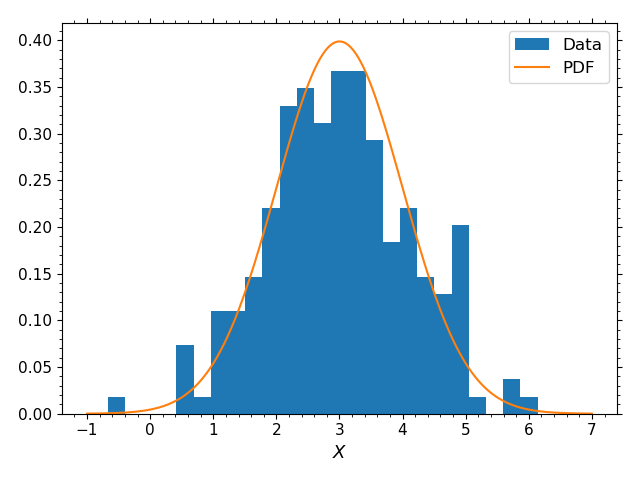

In [5]:
## plot it
from numba_stats import norm
f1, a1 = plt.subplots()
a1.hist(data, density=True, bins=25, label='Data')
x=np.linspace(-1,7,200)
a1.plot(x, norm.pdf(x, 3, 1), label='PDF')
a1.set_xlabel('$X$')
a1.legend()

In [6]:
## make our likelihood function 
def _likelihood(mu, sigma):
    return np.prod( norm.pdf(data, mu, sigma) )

likelihood = np.vectorize( _likelihood )
 
## will also do one for the log likelihood
def _loglikelihood(mu, sigma):
    return np.sum( norm.logpdf(data,mu, sigma) )

loglikelihood = np.vectorize( _loglikelihood )

In [7]:
## now going to evaluate the likelihood so I can draw it

# make linear spaces
x = np.linspace(2.7, 3.3, 100)
y = np.linspace(0.9, 1.3, 100)

# mesh into a grid
X, Y = np.meshgrid(x,y)

# evaluate the likelihood and the log-likelihood
L = likelihood(X, Y)
lnL = loglikelihood(X, Y)
    

### Drawing the likelihood as a surface
 - See how this looks when you look directly from the side or from the top

Text(0.5, 0, 'Likelihood')

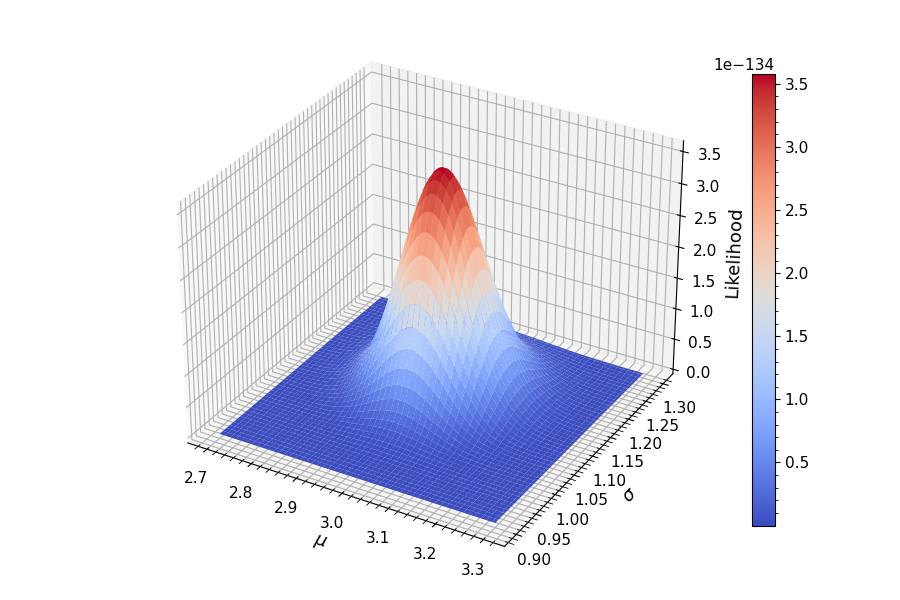

In [8]:
f2 = plt.figure(figsize=(9,6))
a2 = f2.add_subplot(111, projection='3d')  

surface = a2.plot_surface(X, Y, L, cmap='coolwarm')
cb = f2.colorbar(surface, shrink=0.8)

a2.set_xlabel('$\mu$')
a2.set_ylabel('$\sigma$')
a2.set_zlabel('Likelihood')

### Drawing the log-likelihood as a surface
 - Let's take a look at the $-2\ln L$ as well
 - See how this looks when you look directly from the side or from the top
 - Especially if you set more sensible ranges on the Z-axis (e.g. `vmax=625`)

Text(0.5, 0, '$-2 \\ln L$')

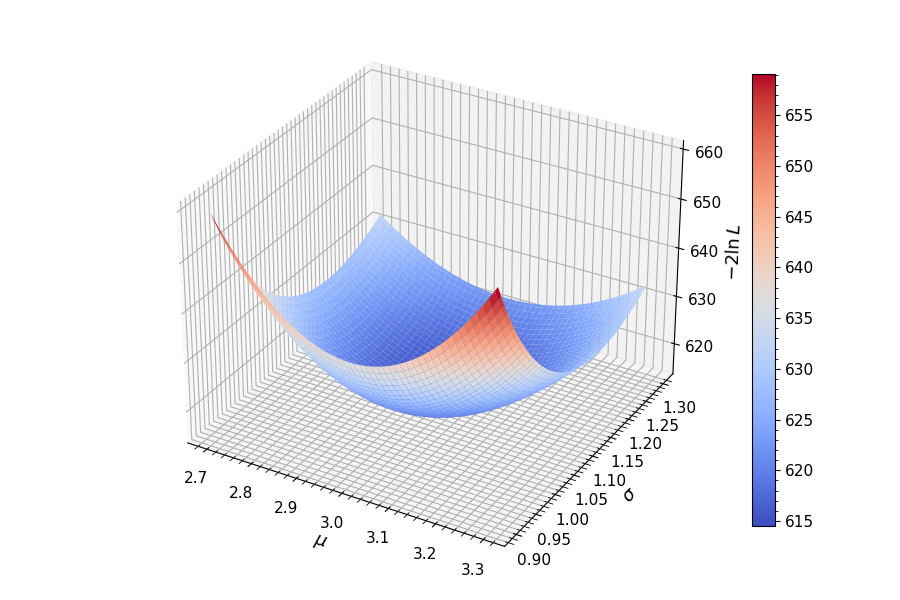

In [9]:
f3 = plt.figure(figsize=(9,6))
a3 = f3.add_subplot(111, projection='3d')  

surface = a3.plot_surface(X, Y, -2*lnL, cmap='coolwarm')
cb = f3.colorbar(surface, shrink=0.8)

a3.set_xlabel('$\mu$')
a3.set_ylabel('$\sigma$')
a3.set_zlabel('$-2 \ln L$')

## Now let's find the maximum of this likelihood
- Want to show the relation to other plots we've seen
- Also more visualisations to see the profile likelihood
- Helps to know where the best-fit point is

In [10]:
# note I already have the likelihood defined
# so don't need to use iminuit.cost

from iminuit import Minuit

def n2ll(mu, sg):
    return -2*_loglikelihood(mu,sg)

mi = Minuit(n2ll, mu=3, sg=1)
mi.migrad()
mi.hesse()
n2ll_min = mi.fval
mi 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 614.5                      │              Nfcn = 42               │
│ EDM = 1.25e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │   2.99    │   0.08    │            │            │         │         │       │
│ 1 │ sg   │   1.12    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       mu       sg │
├────┼───────────────────┤
│ mu │  0.00632 9.56e-07 │
│ sg │ 9.56e-07  0.00316 │
└────┴───────────────────┘

- establishing best-fit point means I can now inspect $-2\Delta \ln L$ (difference to min)
- explore this plot from all angles

Text(0.5, 0, '$-2\\Delta \\ln L$')

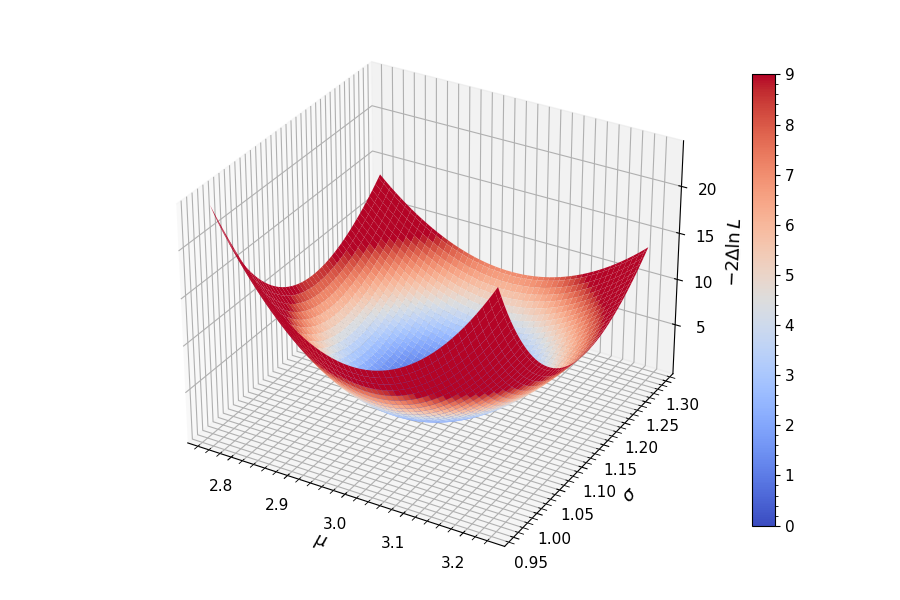

In [11]:
## recomp x and y based on the fit values now (to get something symmetric)
mv, me = mi.values['mu'], mi.errors['mu']
sv, se = mi.values['sg'], mi.errors['sg']

x = np.linspace(mv-3*me, mv+3*me, 100)
y = np.linspace(sv-3*se, sv+3*se, 100)

X, Y = np.meshgrid(x,y)
N2lnL = -2*loglikelihood(X,Y) - mi.fval

f4 = plt.figure(figsize=(9,6))
a4 = f4.add_subplot(111, projection='3d')  

surface = a4.plot_surface(X, Y, N2lnL, vmin=0, vmax=9, cmap='coolwarm')
cb = f4.colorbar(surface, shrink=0.8)

a4.set_xlabel('$\mu$')
a4.set_ylabel('$\sigma$')
a4.set_zlabel('$-2\Delta \ln L$')

- It should now be clear exactly what these 2D likelihood plots are showing


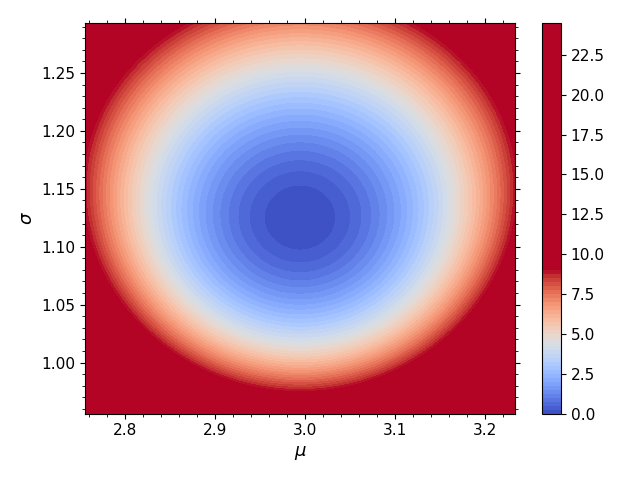

In [12]:
f5, a5 = plt.subplots()
cb = a5.contourf( X, Y, N2lnL, levels=100, vmax=9, cmap='coolwarm')
a5.set_xlabel('$\mu$')
a5.set_ylabel('$\sigma$')
f5.colorbar(cb)

Text(0, 0.5, '$\\sigma$')

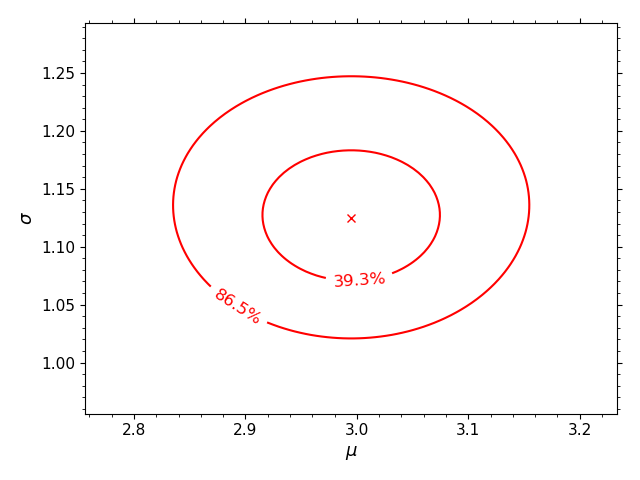

In [13]:
from scipy.stats import chi2
f6, a6 = plt.subplots()
cs = a6.contour( X, Y, N2lnL, levels=[1,4], colors='r')
a6.clabel(cs, cs.levels, inline=True, fmt=lambda x: f'{chi2.cdf(x,2):3.1%}' )
a6.plot( mv, sv, 'rx' )
a6.set_xlabel('$\mu$')
a6.set_ylabel('$\sigma$')

- Why plot like this?

### The profile likelihood

- Scan along one (or two) parameters of the model
- Minimise with respect to **all other parameters**

In [14]:
## pl scan in mu
mu_vals = np.linspace(mv-3*me, mv+3*me, 100)

## vector to store sigma vals at the min in mu
sg_pll_vals = []

## vector to store nll vals at the min in mu
nll_vals = []

for muv in mu_vals:
    mi.values['mu'] = muv
    mi.fixed['mu'] = True
    mi.migrad()
    mi.hesse()
    
    nll_vals.append( mi.fval )
    sg_pll_vals.append( mi.values['sg'] )

### Now draw our profile likelihood

Text(0, 0.5, 'Profile Likelihood')

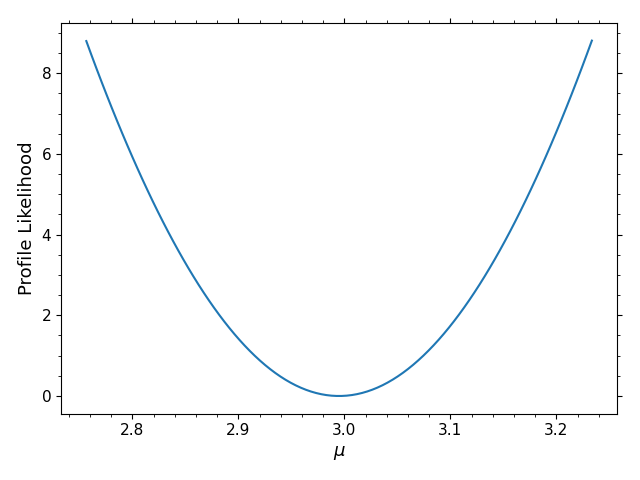

In [15]:
f7, ax7 = plt.subplots()
ax7.plot( mu_vals, np.array(nll_vals)-n2ll_min )
ax7.set_xlabel('$\mu$')
ax7.set_ylabel('Profile Likelihood')

### What does this correspond to?
- Let's draw these values versus the sigma values found at their minimum
- See what values the profile picks out

Text(0, 0.5, '$sg$')

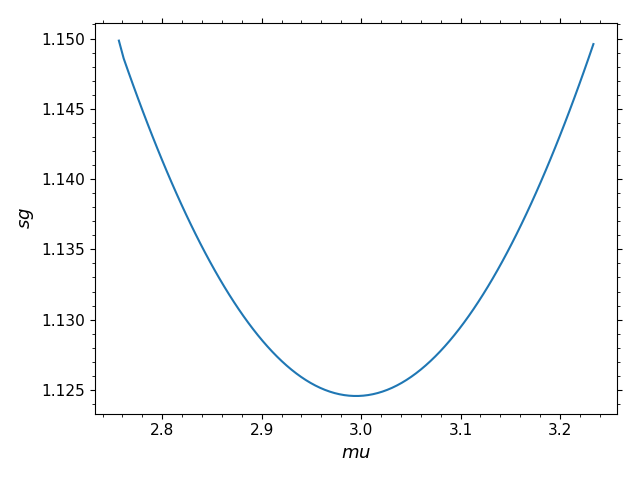

In [16]:
f8, a8 = plt.subplots()
a8.plot( mu_vals, sg_pll_vals )
a8.set_xlabel('$mu$')
a8.set_ylabel('$sg$')

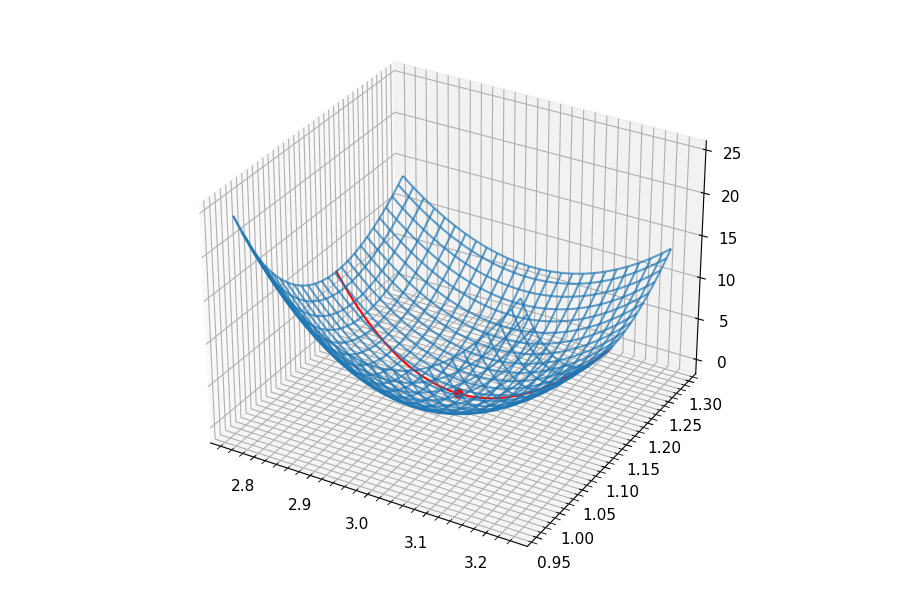

In [17]:
f9 = plt.figure(figsize=(9,6))
a9 = f9.add_subplot(111, projection='3d')  

a9.plot_wireframe(X, Y, N2lnL, alpha=0.7, rcount=25, ccount=25)
a9.plot( mu_vals, sg_pll_vals, np.array(nll_vals)-n2ll_min, 'r-')
a9.scatter( [mv], [sv], [0], c='r', marker='o', s=40)


# <font color="darkred">*Musical interlude...*</font>

## A simple hypothesis test example

- Let's do a nice easy hypothesis test example
- A counting experiment with a single bin
- Counting trains that come past
    - I <font color="blue">observe</font> some number $d$
    - I expect some number of <font color="blue">passenger</font> trains, will call this my <font color="blue">background</font>, $b$
    - I then **infer** the number of <font color="blue">freight</font> trains, call this my <font color="blue">signal</font>, $\hat{s} = d - b$
    
- Will pretend the parameters are such that:
  - $d = 58$
  - $b = 50$
  - and therefore $\hat{s} = d - b = 8$

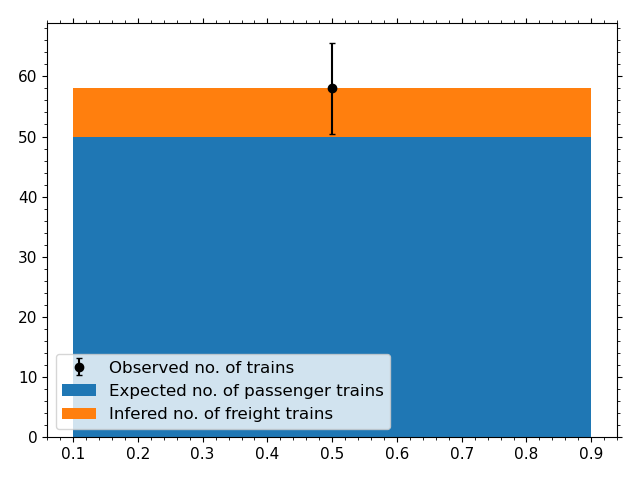

In [18]:
d = 58
b = 50
shat = d - b


fig, ax = plt.subplots()
ax.errorbar(0.5, d, d**0.5, fmt='ko', label='Observed no. of trains' )
ax.bar(0.5, b, label='Expected no. of passenger trains' )
ax.bar(0.5, shat, bottom=b, label='Infered no. of freight trains')
ax.legend()

- Hopefully you get the idea how this could be extended to many bins
- Or indeed a distribution with any shape

### Let's pick a test statistic
- remember I can use **anything** I want for this
- for simple visualisation purposes let's use the extracted signal, $T=\hat{s}$

### The value of $T$ in data
- $T_{obs} = \hat{s} = 8 $

### The distribution of $T$ under $H_0$

- can generate toys from $H_0$ and extract inferred signal back on each

In [19]:
h0_toys = np.random.poisson( b, size=100000 ) - b

- also emprically know this will be Poisson distribution with expectation $b$

In [20]:
from scipy.stats import poisson
h0_dist = lambda x: poisson.pmf(x+b, b)

Text(0, 0.5, '$p(T|H_0)$')

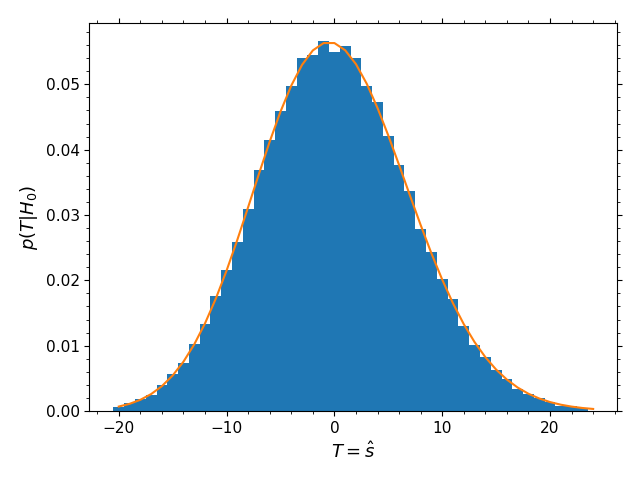

In [21]:
## let's draw this
fig, ax = plt.subplots()

xrange = (-20,25)
ax.hist(h0_toys, bins=np.arange(*xrange)-0.5, density=True )

x = np.arange(*xrange)
ax.plot(x, h0_dist(x))

ax.set_xlabel('$T=\hat{s}$')
ax.set_ylabel('$p(T|H_0)$')


### The distribution of $T$ under $H_1$

- so what is $H_1$?
- well I am free to pick so I will do that and pick $H_1$ to be the alternate hypothesis where I expect the background $b=50$ trains **plus** an additional $20$ signal trains
- can generate toys from $H_1$ and extract inferred signal back on each

In [22]:
h1_s = 20
h1_toys = np.random.poisson( h1_s + b, size=100000 ) - b

- also emprically know this will be Poisson distribution with expectation $s_{H1}+b$

In [23]:
from scipy.stats import poisson
h1_dist = lambda x: poisson.pmf(x+b, h1_s + b)

Text(0, 0.5, '$p(T|H_1)$')

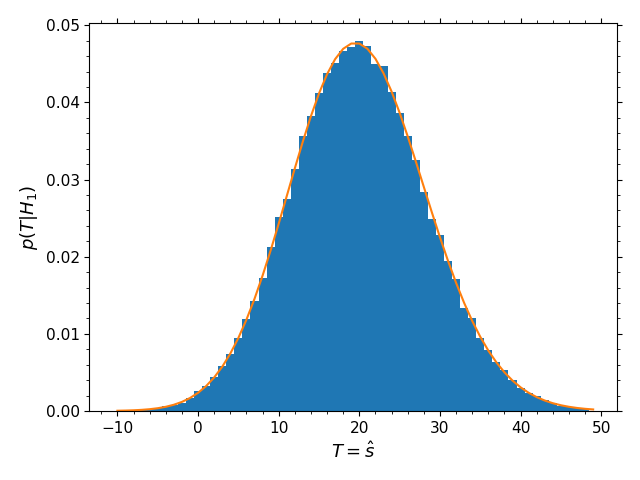

In [24]:
## let's draw this
fig, ax = plt.subplots()

xrange = (-10,50)
ax.hist(h1_toys, bins=np.arange(*xrange)-0.5, density=True )

x = np.arange(*xrange)
ax.plot(x, h1_dist(x))

ax.set_xlabel('$T=\hat{s}$')
ax.set_ylabel('$p(T|H_1)$')


### Now let's set some exclusions up

- Visualise both on the same plot

Text(0, 0.5, '$p(T)$')

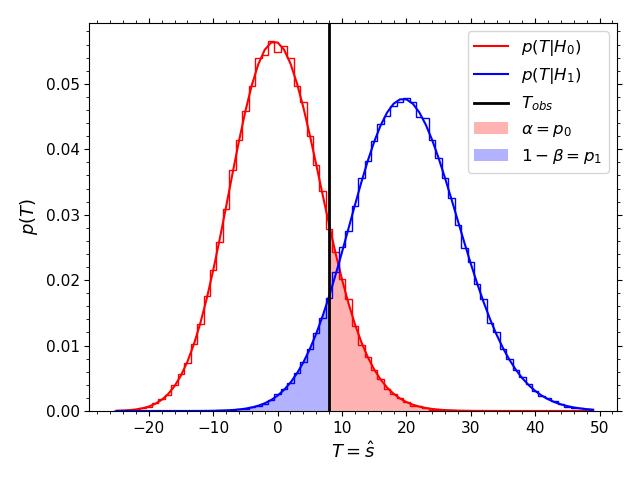

In [25]:
fig, ax = plt.subplots()

xrange = (-25,50)
x = np.arange(*xrange)

# plot T dist under H0
ax.hist(h0_toys, bins=np.arange(*xrange)-0.5, density=True, color='r', histtype='step' )
ax.plot(x, h0_dist(x), c='r', label=r'$p(T|H_0)$')

# plot T dist under H1
ax.hist(h1_toys, bins=np.arange(*xrange)-0.5, density=True, color='b', histtype='step' )
ax.plot(x, h1_dist(x), c='b', label=r'$p(T|H_1)$')

# plot T observed
ax.axvline(shat, c='k', lw=2, label=r'$T_{obs}$')

# plot alpha and 1-beta regions
xa = np.arange(shat, xrange[1])
ax.fill_between(xa, 0, h0_dist(xa), fc='r', alpha=0.3, label=r'$\alpha = p_0$')
xb = np.arange(xrange[0], shat+1)
ax.fill_between(xb, 0, h1_dist(xb), fc='b', alpha=0.3, label=r'$1-\beta = p_1$')

ax.legend()
ax.set_xlabel('$T=\hat{s}$')
ax.set_ylabel('$p(T)$')

### So what limits can we set?

In [26]:
# via the p.d.f.s 
p0 = poisson.sf( shat+b, b )
p1 = poisson.cdf( shat+b, h1_s+b)
print(p0, p1)

# via the toys 
p0 = np.sum( h0_toys > shat ) / len(h0_toys)
p1 = np.sum( h1_toys < shat ) / len(h1_toys)
print(p0, p1)

0.11639089853374462 0.08159314064008392
0.11599 0.06417


- Reject $H_0$ with $p$-value $p_0 = 0.12$ i.e. at 88% C.L
- Reject $H_1$ with $p$-value $p_1 = 0.06$ i.e. at 94% C.L

- If using the $CL_s$ method then reject $H_1$ with
$$ p_s = \frac{p_1}{1-p_0} $$

In [27]:
ps = p1 / (1-p0)
print(ps)

0.07258967658736892


- Reject $H_1$ with $p$-value $p_s = 0.07$ i.e. at 93% C.L

## Now what about the expected limits?

- Expectation under what?

- Let's do under $H_0$ first

In [28]:
exp_H0 = np.median(h0_toys)
exp_H0_p0 = 0.5 # by defintion
exp_H0_p1 = np.sum( h1_toys < exp_H0 ) / len( h1_toys )
exp_H0_ps = exp_H0_p1 / ( 1 - exp_H0_p0 )
print(exp_H0_p0, exp_H0_p1, exp_H0_ps)


0.5 0.00514 0.01028


- Expect to reject $H_1$ at 99.5% C.L. (with $CL_{sb}$ method) and 99% C.L. (with $CL_{s}$ method) 
- Clearly always a doubling of $CL_s$ here as $p_b$ under $H_0$ exp is 0.5

Text(0, 0.5, '$p(T)$')

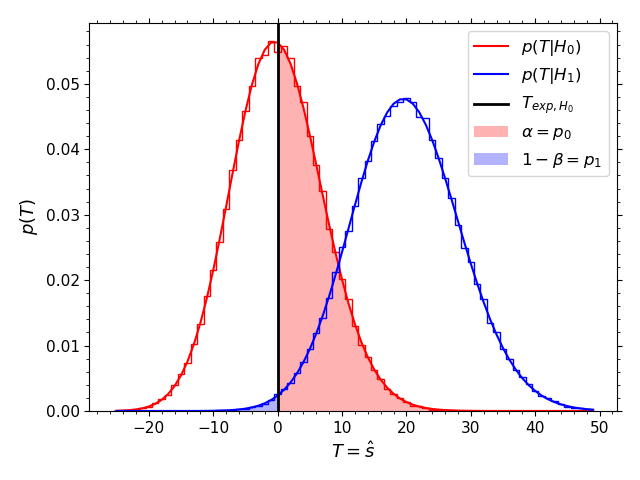

In [29]:
fig, ax = plt.subplots()

xrange = (-25,50)
x = np.arange(*xrange)

# plot T dist under H0
ax.hist(h0_toys, bins=np.arange(*xrange)-0.5, density=True, color='r', histtype='step' )
ax.plot(x, h0_dist(x), c='r', label=r'$p(T|H_0)$')

# plot T dist under H1
ax.hist(h1_toys, bins=np.arange(*xrange)-0.5, density=True, color='b', histtype='step' )
ax.plot(x, h1_dist(x), c='b', label=r'$p(T|H_1)$')

# plot T observed
ax.axvline(exp_H0, c='k', lw=2, label=r'$T_{exp, H_0}$')

# plot alpha and 1-beta regions
xa = np.arange(exp_H0, xrange[1])
ax.fill_between(xa, 0, h0_dist(xa), fc='r', alpha=0.3, label=r'$\alpha = p_0$')
xb = np.arange(xrange[0], exp_H0+1)
ax.fill_between(xb, 0, h1_dist(xb), fc='b', alpha=0.3, label=r'$1-\beta = p_1$')

ax.legend()
ax.set_xlabel('$T=\hat{s}$')
ax.set_ylabel('$p(T)$')

- Expectation under $H_1$

In [30]:
exp_H1 = np.median(h1_toys)
exp_H1_p0 = np.sum( h0_toys > exp_H1 ) / len(h1_toys)
exp_H1_p1 = 0.5 # by definition
exp_H1_ps = exp_H1_p1 / ( 1 - exp_H1_p0 )
print(exp_H1_p0, exp_H1_p1, exp_H1_ps)


0.00268 0.5 0.5013436008502787


- Expect to reject $H_0$ at 99.7% C.L. 

Text(0, 0.5, '$p(T)$')

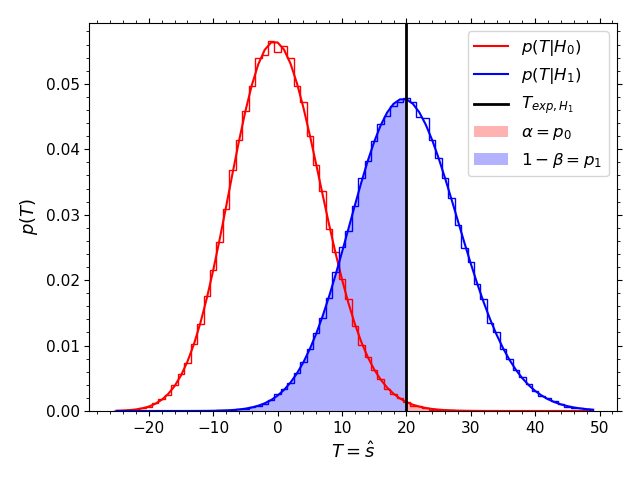

In [31]:
fig, ax = plt.subplots()

xrange = (-25,50)
x = np.arange(*xrange)

# plot T dist under H0
ax.hist(h0_toys, bins=np.arange(*xrange)-0.5, density=True, color='r', histtype='step' )
ax.plot(x, h0_dist(x), c='r', label=r'$p(T|H_0)$')

# plot T dist under H1
ax.hist(h1_toys, bins=np.arange(*xrange)-0.5, density=True, color='b', histtype='step' )
ax.plot(x, h1_dist(x), c='b', label=r'$p(T|H_1)$')

# plot T observed
ax.axvline(exp_H1, c='k', lw=2, label=r'$T_{exp, H_1}$')

# plot alpha and 1-beta regions
xa = np.arange(exp_H1, xrange[1])
ax.fill_between(xa, 0, h0_dist(xa), fc='r', alpha=0.3, label=r'$\alpha = p_0$')
xb = np.arange(xrange[0], exp_H1+1)
ax.fill_between(xb, 0, h1_dist(xb), fc='b', alpha=0.3, label=r'$1-\beta = p_1$')

ax.legend()
ax.set_xlabel('$T=\hat{s}$')
ax.set_ylabel('$p(T)$')

### Exclusion summary 

- I have now determined that for a number of signal $s=20$ (set as my $H_1$) that under the $CL_s$ method
    - My observed exclusion is $p=0.07$ (I exclude at 93% confidence)
    - My expected exclusion under $H_0$ is $p=0.01$ (I expect to exluce at 99% confidence)
        - this suggest I have seen some signal (my observed exclusion is weaker than I expect)
    - My expected exclusions under $H_1$ is $p=0.5$ (I expect to exclude at 50% - of course I do)
        - but suggests that I have good separation power between $H_0$ and $H_1$
<br><br>
- **This now gives me a point to plot for $s=20$**
- Need to do the same test at several values of $s$ and find the one that gives desired exclusion

In [32]:
print( ps )
print( exp_H0_ps )
print( exp_H1_ps )

0.07258967658736892
0.01028
0.5013436008502787


## Why not use Neyman-Pearson test-statistic

- Because it made the demonstration easier
- It should be more powerful
- Let's have a go with that one now

- In previous problem sheet saw that for a counting experiment

$$ T = 2\ln(L_1/L_0) = 2\left[ d\ln(s+b) - s - d\ln(b) \right] $$

In [33]:
def test_stat(d, s, b):
    #c1 = poisson.logpmf(d, s+b) - poisson.logpmf(d, b)
    c2 = d*np.log(s+b) - s - d*np.log(b)
    #print( np.max(c1-c2) )
    return 2*c2

In [34]:
T_obs = test_stat(d, shat, b)

T_H0 = test_stat( h0_toys+b, h0_toys, np.full_like(h0_toys, b) )

T_H1 = test_stat( h1_toys+b, h1_toys, np.full_like(h1_toys, b) )

Text(0, 0.5, 'Probability')

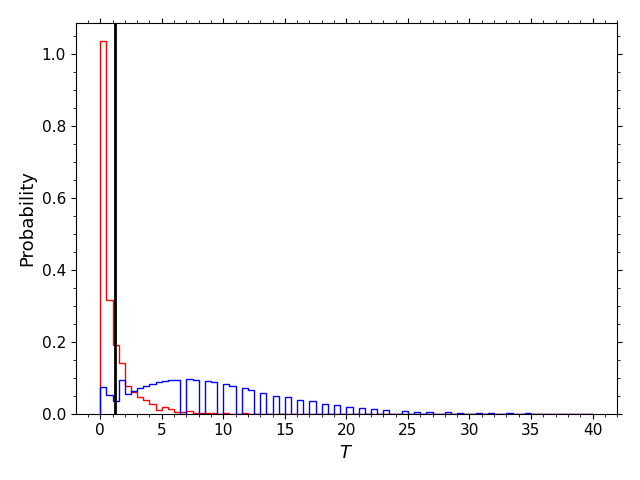

In [35]:
fig, ax = plt.subplots()

ax.hist( T_H0, density=True, bins=80, range=(0,40), color='r', histtype='step' )
ax.hist( T_H1, density=True, bins=80, range=(0,40), color='b', histtype='step' )
ax.axvline( T_obs, c='k', lw=2)

ax.set_xlabel('$T$')
ax.set_ylabel('Probability')

In [36]:
p0 = np.sum( T_H0 > T_obs ) / len( T_H0 )
p1 = np.sum( T_H1 <T_obs ) / len( T_H1 )
ps = p1 / (1-p0)

print(p0, p1, ps)

0.25916 0.06387 0.08621294746503969


# End of Lecture 20

By the end of this lecture you should:

- Really understand confusing concepts in likelihood estimation and hypothesis testing